In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings
warnings.simplefilter("ignore")
%matplotlib inline

In [3]:
df=pd.read_csv("Classified Data",index_col=0)

In [4]:
df.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


In [5]:
col=df.columns[:-1]

In [6]:
X=df[col]

In [7]:
X.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167


In [8]:
y=df["TARGET CLASS"]

In [9]:
from sklearn.preprocessing import StandardScaler

In [10]:
sclar_data=StandardScaler()

In [11]:
sclar_data.fit(X)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [12]:
s_data=sclar_data.transform(X)

In [13]:
X=pd.DataFrame(columns=col,data=s_data)

In [14]:
y.head()
X.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ
0,-0.123542,0.185907,-0.913431,0.319629,-1.033637,-2.308375,-0.798951,-1.482368,-0.949719,-0.643314
1,-1.084836,-0.430348,-1.025313,0.625388,-0.444847,-1.152706,-1.129797,-0.202240,-1.828051,0.636759
2,-0.788702,0.339318,0.301511,0.755873,2.031693,-0.870156,2.599818,0.285707,-0.682494,-0.377850
3,0.982841,1.060193,-0.621399,0.625299,0.452820,-0.267220,1.750208,1.066491,1.241325,-1.026987
4,1.139275,-0.640392,-0.709819,-0.057175,0.822886,-0.936773,0.596782,-1.472352,1.040772,0.276510


In [15]:
from sklearn.model_selection import train_test_split

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [17]:
from sklearn.linear_model import LogisticRegression

In [18]:
log=LogisticRegression()

In [19]:
log.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [20]:
y_pred=log.predict(X_test)

In [21]:
from sklearn.metrics import classification_report, SCORERS,accuracy_score,average_precision_score,confusion_matrix,mean_squared_error

In [22]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.95      0.96      0.96       106
           1       0.96      0.95      0.95        94

   micro avg       0.95      0.95      0.95       200
   macro avg       0.96      0.95      0.95       200
weighted avg       0.96      0.95      0.95       200



In [89]:
print(accuracy_score(y_test,y_pred))

0.955


In [90]:
print(average_precision_score(y_test,y_pred))

0.9310855639441775


In [91]:
print(confusion_matrix(y_test,y_pred))

[[102   4]
 [  5  89]]


In [92]:
print(mean_squared_error(y_test,y_pred))

0.045


In [25]:
from sklearn.neighbors import KNeighborsClassifier

In [27]:
knn=KNeighborsClassifier(n_neighbors=10) # we will start with random number 10 later we will optimize using elbow method

In [29]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=10, p=2,
           weights='uniform')

In [30]:
pred=knn.predict(X_test)

In [31]:
print(accuracy_score(y_test,pred))

0.945


# Creating a loop to check and if we increase the score by different value of K 

In [33]:
scores=[]
for i in range(1,50):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i=knn.predict(X_test)
    scores.append(np.mean(pred_i!=y_test))
print(scores)
    

[0.08, 0.085, 0.06, 0.085, 0.075, 0.065, 0.06, 0.055, 0.055, 0.055, 0.065, 0.055, 0.05, 0.05, 0.055, 0.05, 0.055, 0.05, 0.05, 0.05, 0.055, 0.045, 0.055, 0.05, 0.06, 0.06, 0.055, 0.06, 0.055, 0.055, 0.06, 0.055, 0.055, 0.05, 0.055, 0.055, 0.055, 0.055, 0.055, 0.05, 0.055, 0.05, 0.05, 0.045, 0.055, 0.055, 0.055, 0.05, 0.055]


Text(0.5,1,'Elbow Chart ')

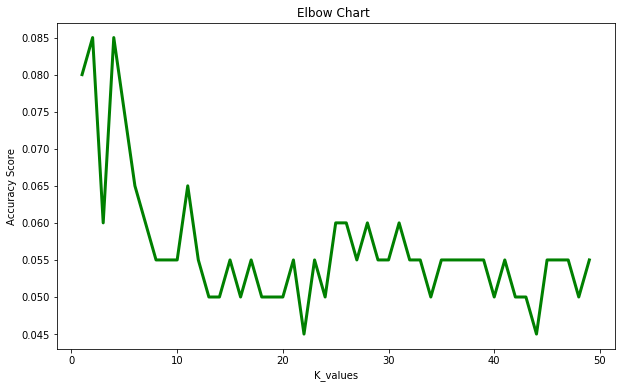

In [42]:
plt.figure(figsize=(10,6))
plt.plot(list(range(1,50)),scores,linestyle="-",lw=3,color="green")
plt.xlabel("K_values")
plt.ylabel("Accuracy Score")
plt.title("Elbow Chart ")

It looks like we get the max score arount 22. now lets try using the value of k as 22 and run the model again>

In [44]:
knn=KNeighborsClassifier(n_neighbors=22) 

In [45]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=22, p=2,
           weights='uniform')

In [46]:
pred=knn.predict(X_test)

In [47]:
print(accuracy_score(y_test,pred))

0.955


# Conclusion:As we can see we have optimized the parameter by using the value of n_neighbours to 22 the accuracy score increased from 0.94 to 0.955